In [2]:
import shap

In [3]:
import pandas as pd
df = pd.read_csv("../data/processed/credit_processed.csv")

X = df.drop(columns = ['Target'])
y = df['Target']

In [4]:
import joblib
gb_cal = joblib.load("../models/gb_calibrated_model.pkl")
gb = joblib.load("../models/gb_model.pkl")

In [5]:
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X)

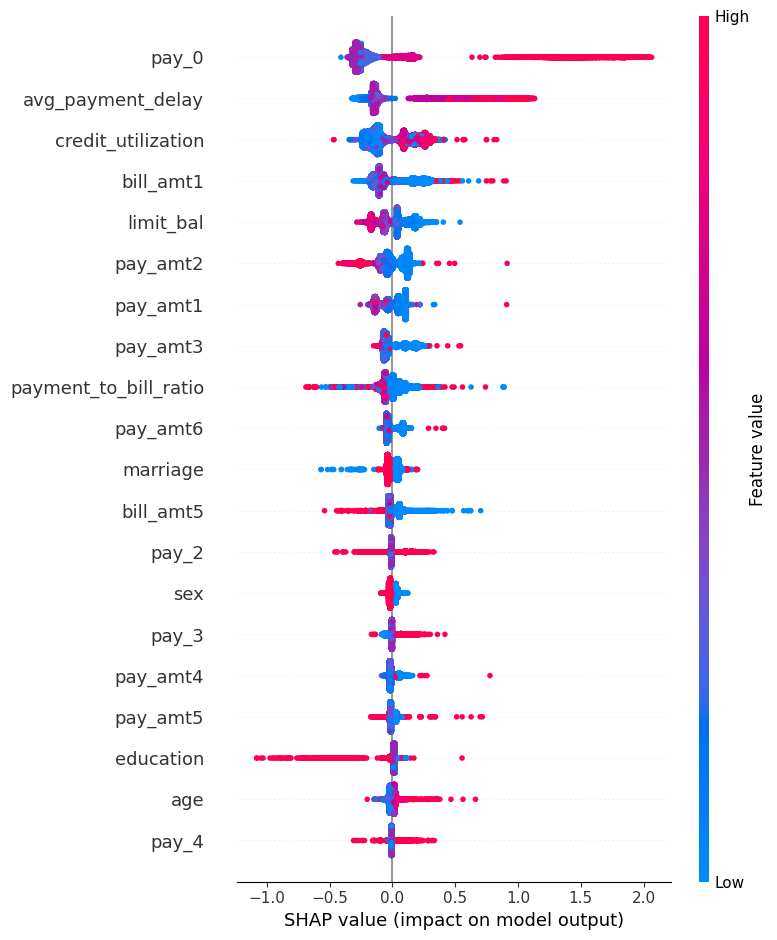

In [6]:
shap.summary_plot(shap_values, X)

__Education has negative effect on payment default. More educated people are less likely to default__

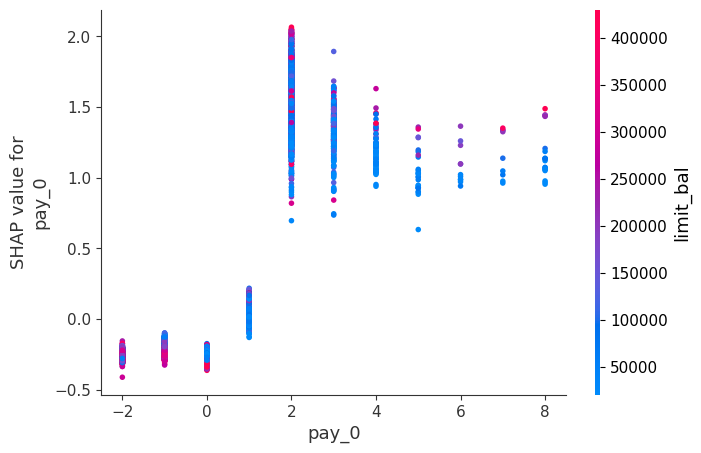

In [7]:
shap.dependence_plot("pay_0", shap_values, X)

In [8]:
df.shape

(30000, 27)

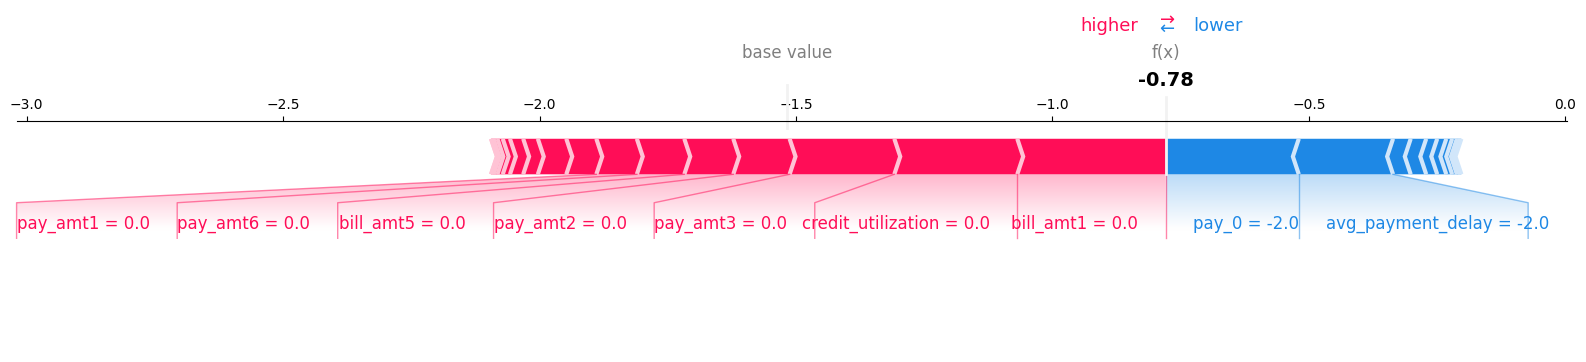

In [10]:
import numpy as np
idx = np.random.RandomState(42).randint(1, 30000)
shap.force_plot(explainer.expected_value, shap_values[idx], X.iloc[idx], matplotlib = True)

- __Avg Model log-odds__ ~(-1.5)
- __Current customer's log-odds__ - (-0.78)
- __Blue - the feature value decreases the prediction (pushes toward non-default / negative class) {pay_0, avg_payment_delay}__
- __Red - the feature value increases the prediction (pushes toward default / positive class){pay_amt, bill_amt, credit_utilization}__

- #### For high-risk customers, recent payment delays and high credit utilization consistently push predictions toward default, while higher credit limits reduce risk.